In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Dataset

In [2]:
! wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv -O data-week-3.csv 

--2023-09-26 18:06:40--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1,4M) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>]   1,41M  6,69MB/s    in 0,2s    

2023-09-26 18:06:40 (6,69 MB/s) - ‘data-week-3.csv’ saved [1475504/1475504]



In [3]:
df = pd.read_csv('data-week-3.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Features

In [4]:
columns_to_process = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']
df = df[columns_to_process]
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


# Data Preparation

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.lower()
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [6]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [7]:
df.engine_hp = df.engine_hp.fillna(0)
df.engine_cylinders = df.engine_cylinders.fillna(0)

In [8]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [9]:
df.rename(columns={'msrp': 'price'}, inplace=True)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [10]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

# Question 1

In [11]:
df.transmission_type.value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

# Question 2

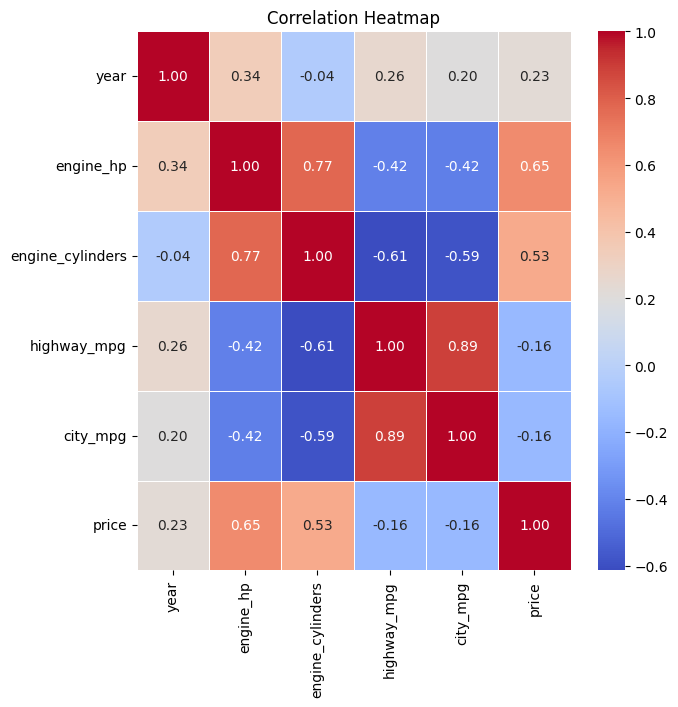

In [12]:
plt.figure(figsize=(7, 7))
sns.heatmap(
    df.corr(numeric_only=True), 
    annot = True, fmt=".2f", linewidths=0.5, cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
df['above_average'] = (df.price > df.price.mean()).astype(int)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [14]:
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

all_columns = categorical + numerical

In [15]:
all_columns

['make',
 'model',
 'transmission_type',
 'vehicle_style',
 'year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg']

In [16]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

len(df), len(df_train), len(df_val), len(df_test)

(11914, 7148, 2383, 2383)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_above_average = df_train.above_average.values
y_val_above_average = df_val.above_average.values
y_test_above_average = df_test.above_average.values

y_train_price = np.log1p(df_train.price.values)
y_val_price = np.log1p(df_val.price.values)
y_test_price = np.log1p(df_test.price.values)

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

del df_train['price']
del df_val['price']
del df_test['price']

In [18]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20


# Question 3

In [19]:
from sklearn.metrics import mutual_info_score

mis = {
    'make': round(mutual_info_score(df_full_train.above_average, df_full_train.make), 2),
    'model': round(mutual_info_score(df_full_train.above_average, df_full_train.model), 2),
    'transmission_type': round(mutual_info_score(df_full_train.above_average, df_full_train.transmission_type), 2),
    'vehicle_style': round(mutual_info_score(df_full_train.above_average, df_full_train.vehicle_style), 2)
}

print(mis)


{'make': 0.24, 'model': 0.46, 'transmission_type': 0.02, 'vehicle_style': 0.08}


# Question 4

In [20]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = df_train[all_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[all_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [21]:
from sklearn.linear_model import LogisticRegression
model_logistic_regression = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model_logistic_regression.fit(X_train, y_train_above_average)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [22]:
from sklearn.metrics import accuracy_score
y_pred_above_average = model_logistic_regression.predict(X_val)
base_accuracy_above_average = accuracy_score(y_val_above_average, y_pred_above_average)

print(f"Base accuracy: {round(base_accuracy_above_average, 4)}")

Base accuracy: 0.9345


# Question 5

In [23]:
features_to_remove = ['year', 'engine_hp', 'transmission_type', 'city_mpg']

for feature in features_to_remove:

    all_columns2 = all_columns.copy()
    all_columns2.remove(feature)

    train_dict = df_train[all_columns2].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[all_columns2].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model_logistic_regression = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model_logistic_regression.fit(X_train, y_train_above_average)

    y_pred_above_average = model_logistic_regression.predict(X_val)
    accuracy_above_average = accuracy_score(y_val_above_average, y_pred_above_average)

    print(f"Removing feature {feature}, accuracy is {round(accuracy_above_average, 4)}, diff is {round(abs(base_accuracy_above_average - accuracy_above_average), 4)}")


Removing feature year, accuracy is 0.9467, diff is 0.0122
Removing feature engine_hp, accuracy is 0.9236, diff is 0.0109
Removing feature transmission_type, accuracy is 0.945, diff is 0.0105
Removing feature city_mpg, accuracy is 0.9463, diff is 0.0117


# Question 6

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [25]:
scaler = MinMaxScaler()

X_train_numerical = df_train[numerical].values
X_train_numerical = scaler.fit_transform(X_train_numerical)

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_categorical = ohe.fit_transform(df_train[categorical].values)

X_train = np.hstack([X_train_numerical, X_train_categorical])

In [26]:
X_val_numerical = df_val[numerical].values
X_val_numerical = scaler.transform(X_val_numerical)

X_val_categorical = ohe.transform(df_val[categorical].values)

X_val = np.hstack([X_val_numerical, X_val_categorical])


In [27]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

for alpha in [0, 0.01, 0.1, 1, 10]:
    model_linear_regression = Ridge(alpha=alpha, random_state=42, solver='sag')
    model_linear_regression.fit(X_train, y_train_price)

    y_pred_price = model_linear_regression.predict(X_val)
    rmse = mean_squared_error(y_val_price, y_pred_price, squared=False)

    print(f"Alpha: {alpha}, RMSE: {round(rmse, 3)}")


Alpha: 0, RMSE: 0.231
Alpha: 0.01, RMSE: 0.224
Alpha: 0.1, RMSE: 0.215
Alpha: 1, RMSE: 0.23
Alpha: 10, RMSE: 0.323
